In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

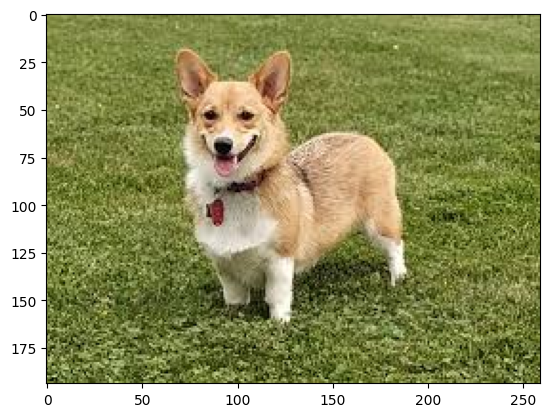

In [2]:
full = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB) 
plt.imshow(full)

In [3]:
full.shape

(194, 259, 3)

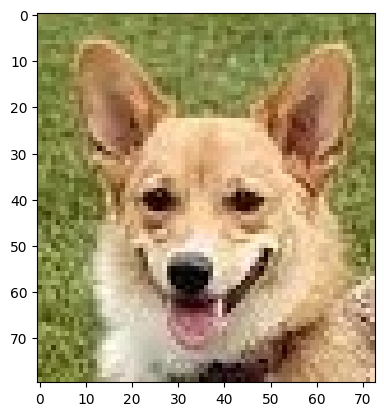

In [4]:
face = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB) 
plt.imshow(face)

In [5]:
face.shape

(80, 73, 3)

# ********************************************************************

# eval fonksiyonu başka bir fonksiyonu bir değişkene tanımlamamızı sağlar bir nevi fonksiyonun adını değiştirmiş olruz


In [6]:
sum([1,2,3,4,5])

15

In [7]:
mystring='sum'

In [8]:
mystring([1,2,3,4,5])

TypeError: 'str' object is not callable

In [9]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [10]:
myfunc=eval(mystring)

In [11]:
myfunc([1,2,3,4,5])

15

# **********************************************************

In [12]:
height, width, channels = face.shape

In [13]:
width

73

In [14]:
my_method = eval('cv2.TM_CCOEFF') # matematiksel methoddumuz
res = cv2.matchTemplate(full, face, my_method) # full resimde face arıyoruz ve res değişkenine atıyoruz 

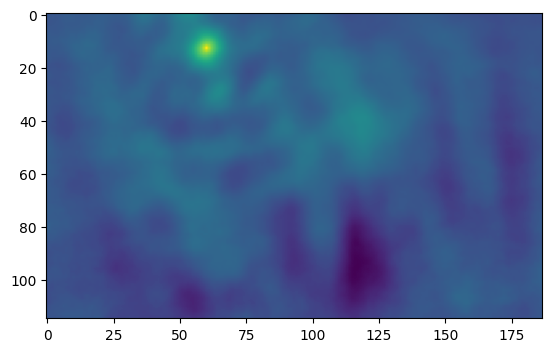

In [15]:
plt.imshow(res)

In [16]:
full = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB) 

face = cv2.imread('C:\\Users\\TUF Dash F15\\Desktop\\cvCourse\\images\\dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB) 


methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

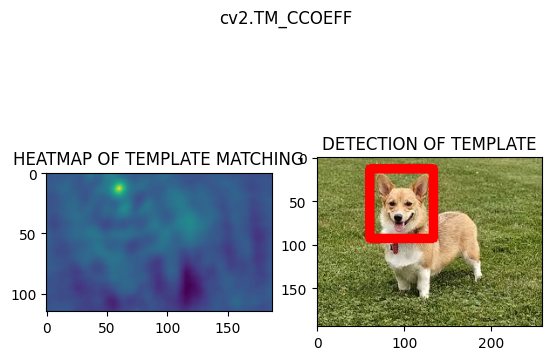

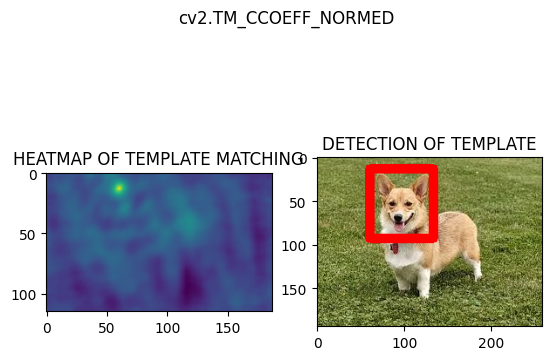

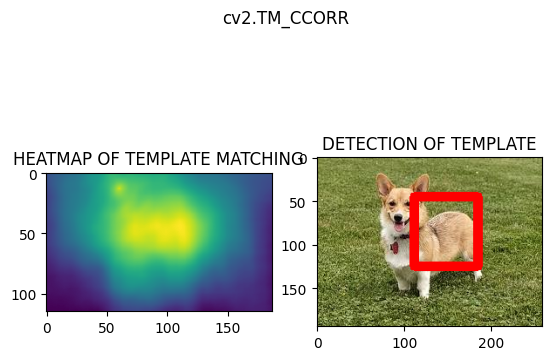

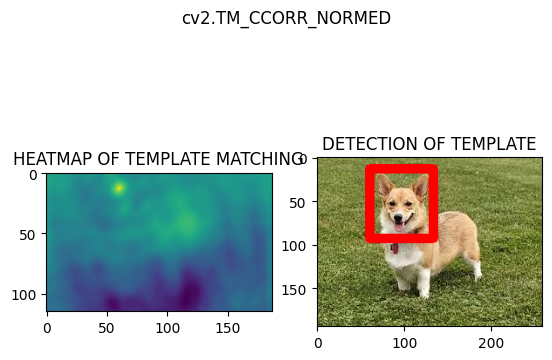

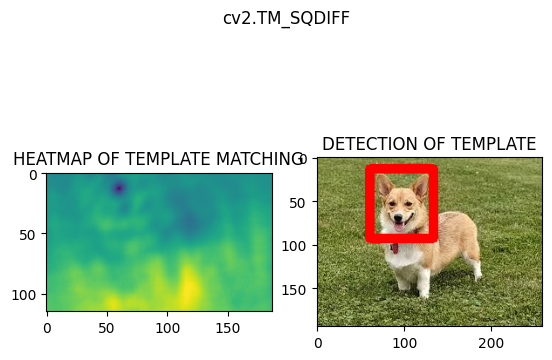

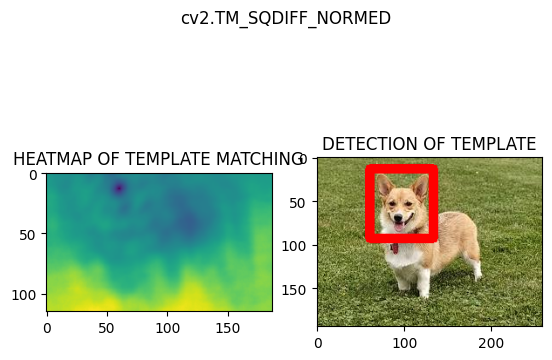

In [17]:
for m in methods:

    full_copy = full.copy()

    method = eval(m) # matematiksel methodlarımızı döngüye sokuyoruz

    res = cv2.matchTemplate(full_copy, face, method) # full resimde face arıyoruz ve res değişkenine atıyoruz

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # res değişkenindeki değerleri min ve max olarak ayırıyoruz böylece aradığımız yüzün konumunu buluyoruz

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: # eğer methodumuz bu ikiden biri ise min_loc kullanıyoruz çünkü bu ikisi için min_loc en iyi sonuçtur 
        top_left = min_loc
    else: # diğer methodlar için max_loc kullanıyoruz çünkü bu ikisi için max_loc en iyi sonuçtur
        top_left = max_loc

    bottom_right = (top_left[0] + width, top_left[1] + height) # yüzün konumunu bulduktan sonra yüzün köşelerini buluyoruz top_left[0] = x top_left[1] = y 
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10) # yüzün köşelerini bulduktan sonra yüzün etrafına mavi bir dikdörtgen çiziyoruz

    # PLOT AND SHOW THE IMAGES
    plt.subplot(121) # subplot ile iki resmi yan yana gösteriyoruz sol tarfta full resim sağ tarfta ise yüzün etrafına çizdiğimiz dikdörtgenli resim 
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')

    plt.subplot(122) # subplot ile iki resmi yan yana gösteriyoruz
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')

    # TITLE WITH THE METHOD USED
    plt.suptitle(m) # subplotların başlıklarını method isimleri ile değiştiriyoruz

    plt.show()
    print('\n')
    print('\n')